# Clustering Methods and Evaluation with Silhouette Score

In this demonstration, we will explore three types of clustering methods and evaluate their performance using the **Silhouette Score**. The clustering methods covered are:

1. **Partitioning Methods (K-Means)**
2. **Hierarchical Methods**
3. **Density-Based Methods (DBSCAN)**

Each method has its own strengths and applications. We will visualize the clustering results and use the Silhouette Score to compare the performance of each method.

---
## Evaluation Metric: Silhouette Score

The **Silhouette Score** is a measure of how similar a data point is to its own cluster compared to other clusters. It is calculated as:

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $a(i)$ is the average distance between point $i$ and all other points in the same cluster.
- $b(i)$ is the average distance between point $i$ and the points in the nearest neighboring cluster.

The Silhouette Score ranges from -1 to 1:
- **1**: Perfectly clustered.
- **0**: Overlapping clusters.
- **Negative values**: Incorrect clustering.

A higher Silhouette Score indicates better-defined clusters.

---

## Setup
Load and Explore the "Penguins" Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the "penguins" dataset from Seaborn
penguins = sns.load_dataset('penguins')

# Explore the basic information about the dataset
print(penguins.head())
print(penguins.info())
print(penguins.describe())

# Drop rows with missing values
penguins = penguins.dropna()

# Convert categorical variables to numerical representations using one-hot encoding
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

# Extract the feature columns for clustering
X = penguins.drop('species_Chinstrap', axis=1)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

In [3]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,True
1,39.5,17.4,186.0,3800.0,False,False,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,True


## Clustering with Partitioning Methods (e.g., K-means)

**K-Means Clustering** is a partitioning method that divides the dataset into $k$ clusters by minimizing the within-cluster variance. The algorithm iteratively assigns each data point to the cluster with the nearest centroid, then updates the centroids until convergence is reached.

**Steps:**
1. Choose the number of clusters $k$.
2. Randomly initialize $k$ centroids.
3. Assign each data point to the nearest centroid.
4. Update the centroids based on the mean of the assigned points.
5. Repeat the process until the centroids no longer change.

**Advantages:**
- Simple and efficient for large datasets.
- Works well with spherical, evenly-sized clusters.

**Limitations:**
- Sensitive to initial centroid placement.
- Requires the number of clusters to be predefined.

---

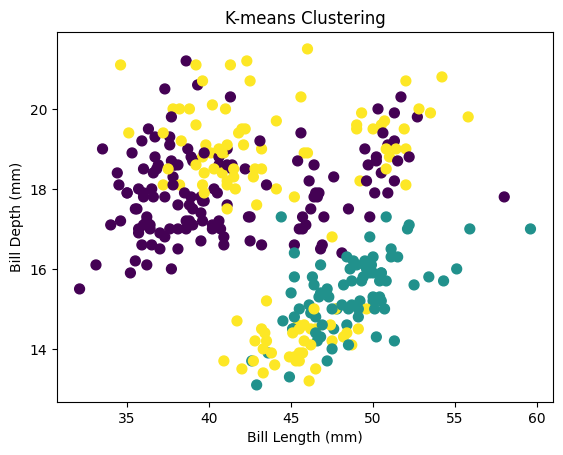

Silhouette Score (K-means): 0.5589


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize K-means clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for K-means clustering
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score (K-means): {silhouette_score_kmeans:.4f}")


## Clustering with Hierarchical Methods (e.g., Agglomerative Clustering)
**Agglomerative Clustering** is a type of hierarchical clustering that builds nested clusters by successively merging or splitting clusters. It is a bottom-up approach where each data point starts in its own cluster, and pairs of clusters are merged as we move up the hierarchy.

**Steps:**
1. Each data point starts as its own cluster.
2. Merge the closest pairs of clusters based on a distance metric.
3. Repeat the process until all points belong to a single cluster or a predefined number of clusters is reached.

**Advantages:**
- Does not require specifying the number of clusters in advance.
- Can capture complex cluster structures.

**Limitations:**
- Computationally expensive for large datasets.
- Sensitive to the choice of distance metric.

---

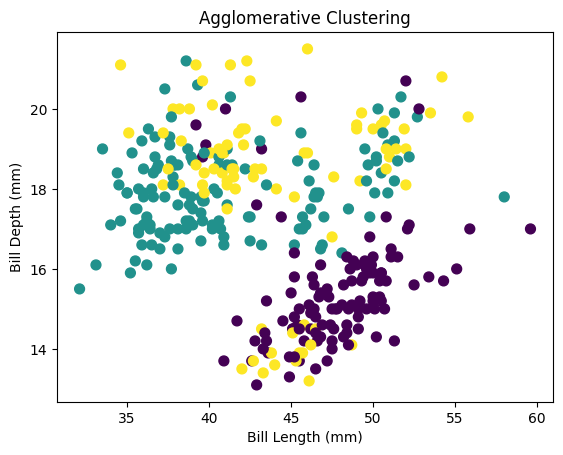

Silhouette Score (Agglomerative Clustering): 0.5164


In [5]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(X)

# Visualize Agglomerative Clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=agglomerative_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for Agglomerative Clustering
silhouette_score_agglomerative = silhouette_score(X, agglomerative_labels)
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_score_agglomerative:.4f}")


## Clustering with Density-Based Methods (e.g., DBSCAN)

**DBSCAN** is a density-based clustering algorithm that groups together points that are closely packed together while marking outliers as noise. DBSCAN requires two parameters: `eps` (the maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the minimum number of points to form a dense region).

**Steps:**
1. For each point, determine the number of neighbors within the `eps` radius.
2. If the number of neighbors is greater than or equal to `min_samples`, consider it a core point and form a cluster.
3. Expand clusters from the core points by including points within `eps` distance.
4. Mark points that are not part of any cluster as noise.

**Advantages:**
- Can find clusters of arbitrary shapes.
- Handles outliers effectively.

**Limitations:**
- The performance depends on the choice of `eps` and `min_samples`.
- Can struggle with varying densities in different parts of the dataset.

---

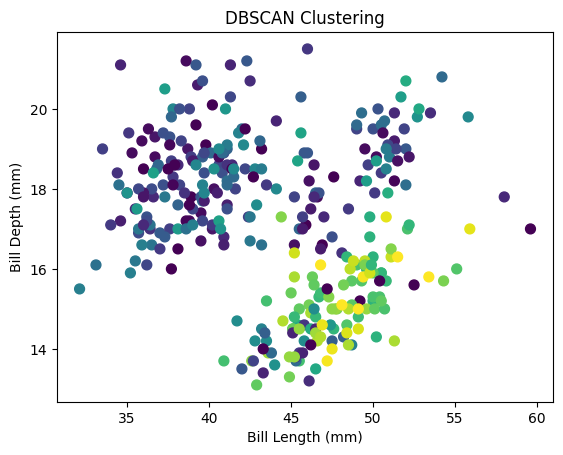

Silhouette Score (DBSCAN): 0.6150


In [6]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clustering results
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for DBSCAN clustering
silhouette_score_dbscan = silhouette_score(X, dbscan_labels)
print(f"Silhouette Score (DBSCAN): {silhouette_score_dbscan:.4f}")

## Compare the Results and Conclusion

In [7]:
# Compare the Silhouette Scores
silhouette_scores = [silhouette_score_kmeans, silhouette_score_agglomerative, silhouette_score_dbscan]
method_names = ['K-means', 'Agglomerative', 'DBSCAN']

for i, score in enumerate(silhouette_scores):
    print(f"Silhouette Score ({method_names[i]}): {score:.4f}")


Silhouette Score (K-means): 0.5589
Silhouette Score (Agglomerative): 0.5164
Silhouette Score (DBSCAN): 0.6150


### Summary

- **K-Means**: Simple, efficient, requires pre-defined number of clusters, works well for spherical clusters.
- **Agglomerative Clustering**: Captures complex structures, but computationally expensive.
- **DBSCAN**: Good for arbitrary shapes and handling noise, sensitive to parameters.
- **Silhouette Score**: Used to evaluate and compare clustering performance, with higher scores indicating better-defined clusters.